In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data (전체).csv')

def parse_time(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df['time'] = df['time'].apply(parse_time)

In [2]:
df

,date,time,entire_num,center_num,bottom_num,right_num
0,2023-05-12,39703,2,1,0,0
1,2023-05-12,39704,2,1,0,0
2,2023-05-12,39705,2,1,0,0
3,2023-05-12,39706,2,1,0,0
4,2023-05-12,39707,2,1,0,0
...,...,...,...,...,...,...
23216,2023-05-19,63341,7,0,6,1
23217,2023-05-19,63342,7,0,6,1
23218,2023-05-19,63343,6,0,6,0
23219,2023-05-19,63344,7,0,7,0


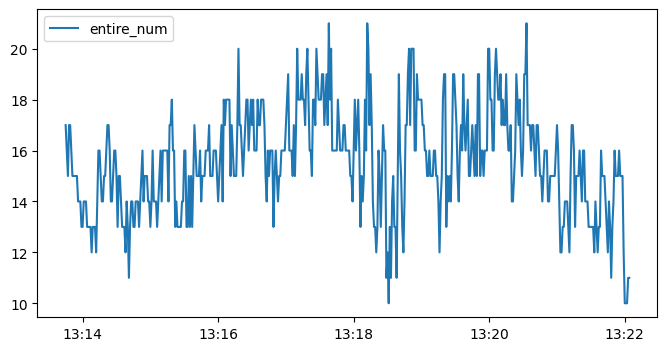

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, MinuteLocator
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,4

start_index = 7500
end_index = 8000

fig, ax = plt.subplots()

# y축의 값을 정수로 표현하도록 설정
#set_major_locator : 주 눈금의 위치를 조정
#MaxNLocator : 눈금의 최대 개수 제한, 정수 위치에만 표시
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# x축의 값을 datetime 형태로 변환
x_values_seconds = np.array(df.time[start_index:end_index])
x_values_time = [timedelta(seconds=int(s)) for s in x_values_seconds]

x_values_datetime = [datetime(1900, 1, 1) + t for t in x_values_time]

#[13:13:45, 13:13:46, 13:13:47 ...]

# x축에 분 단위로 표시
minutes = MinuteLocator(interval = 2)
m_fmt = DateFormatter('%H:%M')

ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(m_fmt)

plt.plot(x_values_datetime, df['entire_num'].values[start_index:end_index], label='entire_num')
plt.legend(loc='upper left')
plt.show()


In [4]:
from scipy.ndimage import gaussian_filter1d

sigma = 10  #6, 10
smoothed = gaussian_filter1d(df['entire_num'], sigma)  # Window size 5, polynomial order 3
df['entire_num_MA_Smooth'] = smoothed

In [5]:
print(df)

             date   time  entire_num  center_num  bottom_num  right_num  \
0      2023-05-12  39703           2           1           0          0   
1      2023-05-12  39704           2           1           0          0   
2      2023-05-12  39705           2           1           0          0   
3      2023-05-12  39706           2           1           0          0   
4      2023-05-12  39707           2           1           0          0   
...           ...    ...         ...         ...         ...        ...   
23216  2023-05-19  63341           7           0           6          1   
23217  2023-05-19  63342           7           0           6          1   
23218  2023-05-19  63343           6           0           6          0   
23219  2023-05-19  63344           7           0           7          0   
23220  2023-05-19  63345           7           0           7          0   

       entire_num_MA_Smooth  
0                         2  
1                         2  
2        

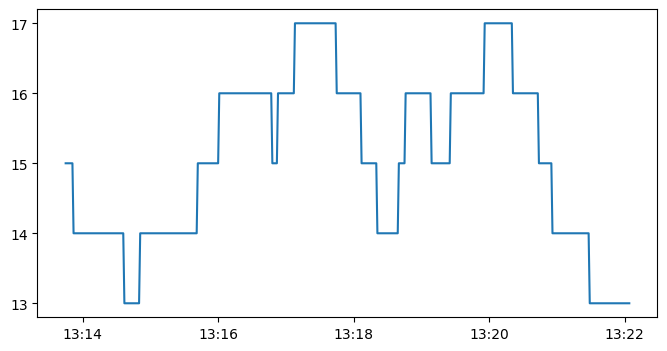

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

start_index = 7500
end_index = 8000

fig, ax = plt.subplots()



# y축의 값을 정수로 표현하도록 설정
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# x축의 값을 3600으로 나눈 값으로 표현하도록 설정
x_values = np.array(df.time[start_index:end_index]) / 3600

# x축에 분 단위로 표시
minutes = MinuteLocator(interval = 2)
m_fmt = DateFormatter('%H:%M')

ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(m_fmt)



# x_values를 분 단위로 변환
x_values_minutes = x_values * 60

# x축에 분:초 형식으로 표시
formatter = DateFormatter('%H:%M')

ax.xaxis.set_major_formatter(formatter)

plt.plot(x_values_datetime, df['entire_num_MA_Smooth'].values[start_index:end_index])
plt.show()

In [7]:
count = 0

for i in range(len(df)-2):
  diff1 = df['entire_num_MA_Smooth'][i+1] - df['entire_num_MA_Smooth'][i]
  diff2 = df['entire_num_MA_Smooth'][i+2] - df['entire_num_MA_Smooth'][i+1]

  if abs(diff1) >=1 and abs(diff2) >=1:
    count +=1

print(count)

0


In [8]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt

#setting figure size
from matplotlib.pylab import rcParams

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import MeanSquaredLogarithmicError

#차트의 기본 크기를 설정합니다.
rcParams['figure.figsize'] = 8,4 #그림(figure)의 크기. (가로,세로) 인치 단위

data = df

#creating dataframe

new_data = data[['entire_num_MA_Smooth', 'center_num', 'bottom_num', 'right_num']].copy()

##new_data = data[['time', 'entire_num', 'center_num', 'bottom_num', 'right_num']].copy()

##new_data['time'] = new_data['time'].apply(parse_time)

print(new_data)


       entire_num_MA_Smooth  center_num  bottom_num  right_num
0                         2           1           0          0
1                         2           1           0          0
2                         2           1           0          0
3                         2           1           0          0
4                         2           1           0          0
...                     ...         ...         ...        ...
23216                     6           0           6          1
23217                     6           0           6          1
23218                     6           0           6          0
23219                     6           0           7          0
23220                     6           0           7          0

[23221 rows x 4 columns]


In [9]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def letsPredict(iteration, loss_function = MeanSquaredLogarithmicError(), epochs = 3, batch_size = 10, time_window = 200, prediction_time = 1200):
  global SLE_df,valid

  #create and fit the Seq2Seq model
  model = Seq2SeqModel(units = 100, time_window = time_window)
  model.compile(loss = loss_function, optimizer='adam')
  #model.fit(x_train, y_train, epochs=1, batch_size=5000, verbose=1) #epdochs =3 , batch_size = 10

  model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, verbose=1) #epdochs =3 , batch_size = 10

  #Transform and scale validation data

  inputs_noscale_df = valid

  # 'Predictions' 열이 이미 있으면 제외하고 스케일링
  if 'Predictions' in inputs_noscale_df.columns:
      inputs_noscale_df = inputs_noscale_df.drop(columns=['Predictions'])
  scaled_inputs = scaler.transform(inputs_noscale_df)

  inputs = pd.DataFrame(scaled_inputs, columns=new_data.columns)

  X_test = []
  for i in range(time_window,len(inputs)-prediction_time):
      X_test.append(inputs.iloc[i-time_window:i+1, :])


  X_test = np.array(X_test)
  X_test = X_test.reshape(-1, time_window + 1, X_test.shape[2])

  predicted_values = model.predict(X_test)
  predicted_values = scaler_y.inverse_transform(predicted_values)
  predicted_values[predicted_values < 0] = 0

  print("valid.shape : ", valid.shape)

  valid_entire_num = valid.iloc[time_window + prediction_time:, 0]  # Assuming 'entire_num' is the second column

  print("valid_entire_num.shape : ", valid_entire_num.shape)
  print("predicted_values.shape : ", predicted_values.shape)

  SLE = np.square(np.log1p(valid_entire_num) - np.log1p(predicted_values.flatten()))

  # SLE를 DataFrame으로 변환하고 CSV 파일에 저장
  column_name = f'SLE{iteration + 1}'
  SLE_df[column_name] = SLE

  #MSLE 계산 및 출력
  MSLE = np.mean(SLE)  # Flatten 'POP' to make it a 1D array
  print(f"MSLE {iteration +1 } : ", MSLE)

  #for plotting
  valid = pd.DataFrame(valid, columns=new_data.columns)

  # 먼저 'Predictions'라는 새로운 컬럼을 생성하고 모두 None으로 채웁니다
  valid['Predictions'] = [None] * len(valid)

  # 그런 다음 'Predictions' 컬럼의 마지막 부분에 predicted_values 리스트의 값들을 추가합니다
  valid.loc[len(valid) - len(predicted_values):, 'Predictions'] = predicted_values

  df['time'] = pd.to_datetime(df['time'], unit='s')

  fig, ax = plt.subplots()

  # y축의 값을 정수로 표현하도록 설정
  ax.yaxis.set_major_locator(plt.MaxNLocator(integer = True))

  # x축에 시간을 시:분 형식으로 표시하도록 설정
  hours = mdates.HourLocator(interval = 1)
  h_fmt = mdates.DateFormatter('%H:%M')
  ax.xaxis.set_major_locator(hours)
  ax.xaxis.set_major_formatter(h_fmt)

  #그래프 라인 그리기
  plt.plot(df['time'][:train_len+time_window], df['entire_num_MA_Smooth'][:train_len+time_window], label="learning", color = "r")
  plt.plot(df['time'][len(df)-len(predicted_values):], df['entire_num_MA_Smooth'][len(df)-len(predicted_values):], label='Validation', color = "b")
  plt.plot(df['time'][len(df)-len(predicted_values):], valid['Predictions'][len(valid)-len(predicted_values):], label=f'Predictions{iteration}', color = 'g')

  plt.ylabel('number of people')
  plt.xlabel('time')
  plt.legend(loc='upper left')
  plt.show()

  return predicted_values

In [11]:
class Seq2SeqModel(tf.keras.Model):
  def __init__(self, units, time_window, **kwargs):
    super(Seq2SeqModel, self).__init__(**kwargs)
    self.units = units
    self.time_window = time_window
    self.encoder = layers.LSTM(units = self.units, return_sequences = True)
    self.decoder = layers.LSTM(units = self.units, return_sequences = False)
    self.output_layer = layers.Dense(1)

  def call(self, inputs):
    encoder_outputs = self.encoder(inputs)
    decoder_outputs = self.decoder(encoder_outputs[:, -self.time_window:, :])
    output = self.output_layer(decoder_outputs)
    return output

scaled_data.shape :  (15480, 4)
Epoch 1/3
1528/1528 [==============================] - 28s 15ms/step - loss: 0.0318
Epoch 2/3
1528/1528 [==============================] - 23s 15ms/step - loss: 0.0100
Epoch 3/3
199/199 [==============================] - 2s 9ms/step
valid.shape :  (7741, 4)
valid_entire_num.shape :  (6341,)
predicted_values.shape :  (6341, 1)
MSLE 1 :  0.1827861405945291


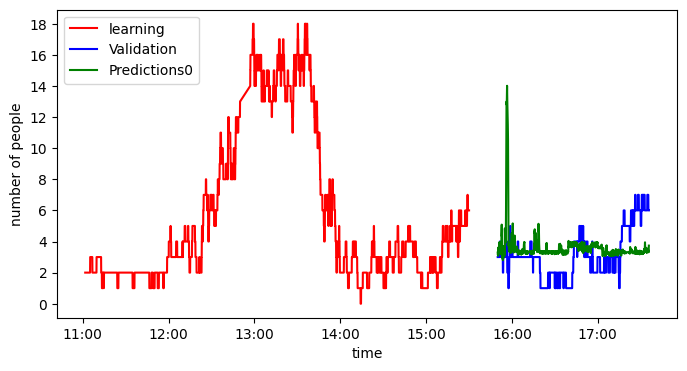

Epoch 1/3
1528/1528 [==============================] - 26s 15ms/step - loss: 0.1041
Epoch 2/3
1528/1528 [==============================] - 23s 15ms/step - loss: 0.1041
Epoch 3/3
199/199 [==============================] - 2s 6ms/step
valid.shape :  (7741, 5)
valid_entire_num.shape :  (6341,)
predicted_values.shape :  (6341, 1)
MSLE 2 :  1.9913397452760149


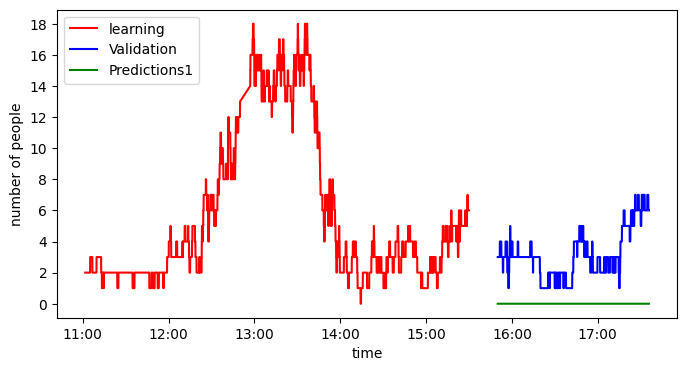

Epoch 1/3
1528/1528 [==============================] - 26s 15ms/step - loss: 0.0127
Epoch 2/3
1528/1528 [==============================] - 23s 15ms/step - loss: 0.0118
Epoch 3/3
199/199 [==============================] - 2s 6ms/step
valid.shape :  (7741, 5)
valid_entire_num.shape :  (6341,)
predicted_values.shape :  (6341, 1)
MSLE 3 :  0.16319463557051175


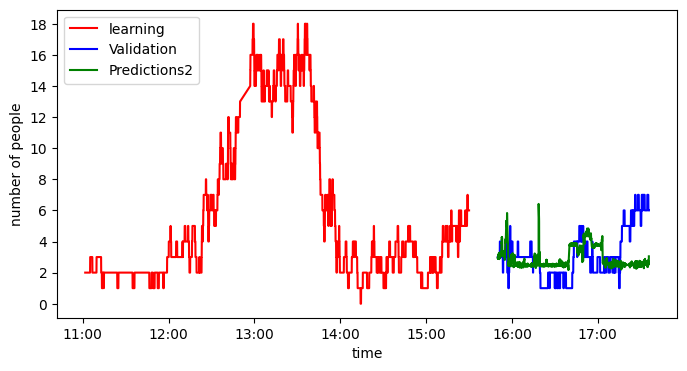

Epoch 1/3
1528/1528 [==============================] - 26s 15ms/step - loss: 0.0122
Epoch 2/3
1528/1528 [==============================] - 23s 15ms/step - loss: 0.0118
Epoch 3/3
199/199 [==============================] - 2s 7ms/step
valid.shape :  (7741, 5)
valid_entire_num.shape :  (6341,)
predicted_values.shape :  (6341, 1)
MSLE 4 :  0.21557174860704012


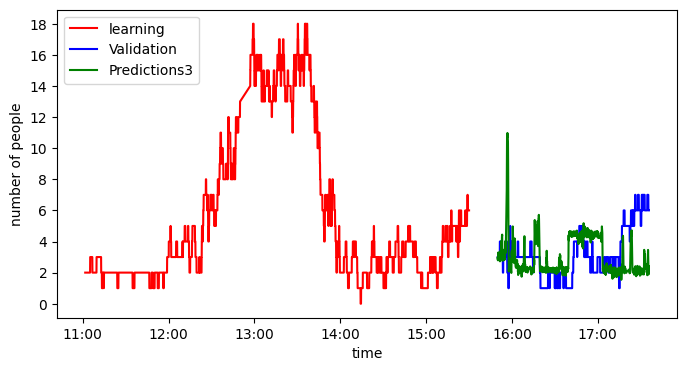

Epoch 1/3
1528/1528 [==============================] - 27s 15ms/step - loss: 0.0118
Epoch 2/3
1528/1528 [==============================] - 23s 15ms/step - loss: 0.0105
Epoch 3/3
199/199 [==============================] - 2s 6ms/step
valid.shape :  (7741, 5)
valid_entire_num.shape :  (6341,)
predicted_values.shape :  (6341, 1)
MSLE 5 :  0.16560201653510317


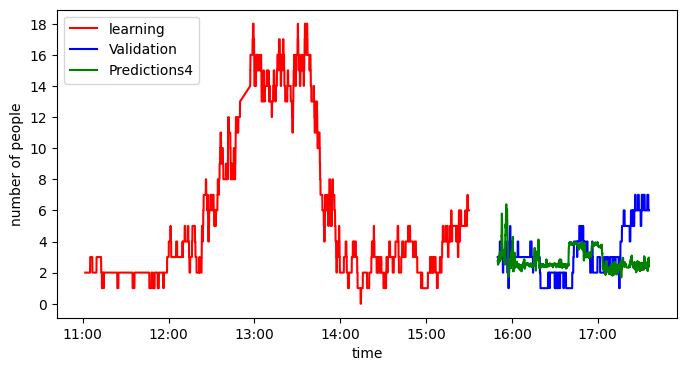

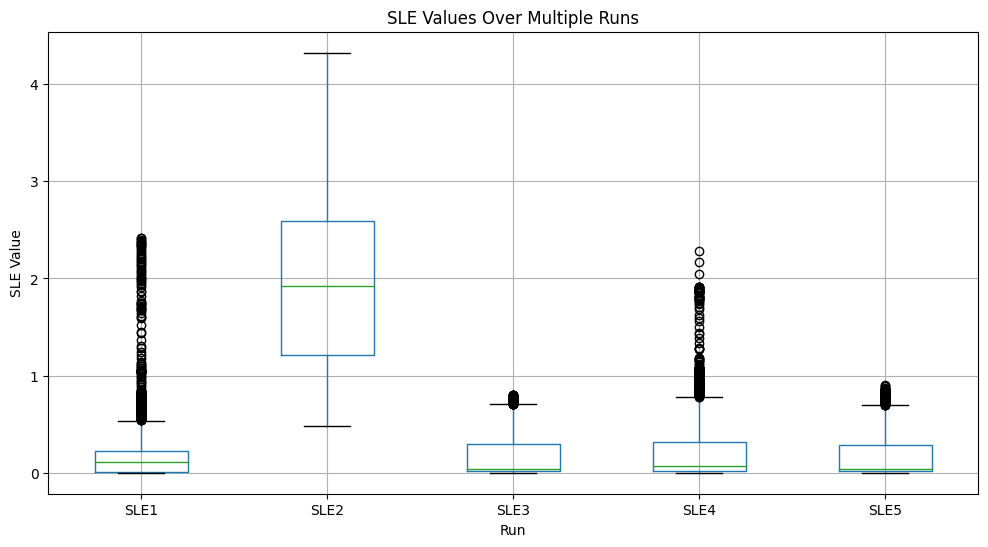

In [14]:


#time열 제거 minmaxscaler사용x 이후 다시 합친다.

dataset = new_data.values

train_len = (len(dataset)*2)//3

train = dataset[0:train_len,:]
train = pd.DataFrame(train, columns = new_data.columns)
valid = dataset[train_len:,:]
valid = pd.DataFrame(valid, columns = new_data.columns)

#값을 0 ~ 1 사이의 값으로 변환 합니다
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train)


scaled_data = pd.DataFrame(scaled_data, columns = new_data.columns)

print("scaled_data.shape : ", scaled_data.shape)  #(15480, 4)


time_window = 200
prediction_time =1200


x_train, y_train = [], []
for i in range(time_window,len(train)):
    x_train.append(scaled_data.iloc[i-time_window:i+1,0:4])
    y_train.append(new_data.iloc[i+prediction_time,0])

y_train = np.array(y_train).reshape(-1,1)

scaler_y = MinMaxScaler(feature_range = (0,1))
scaled_y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

y_train = scaled_y_train

# x_train [0:time_window]=>0:59까지데이터 y_train [time_window]
x_train, y_train = np.array(x_train), np.array(y_train)


# SLE 값을 저장할 빈 DataFrame 초기화
SLE_df = pd.DataFrame()

for i in range(5):
  predicted_values = letsPredict(iteration = i)


# 모든 반복이 끝난 후에 DataFrame을 CSV 파일로 저장
SLE_df.to_csv('SLE_values.csv', index=False)

# CSV 파일 읽기
data = pd.read_csv('SLE_values.csv')

# 박스플롯으로 시각화
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title("SLE Values Over Multiple Runs")
plt.xlabel("Run")
plt.ylabel("SLE Value")
plt.show()

In [13]:
#SLE 값들이 저장된 CSV 파일 읽기
data = pd.read_csv('SLE_values.csv')

#각 SLE 열에 대한 통계 저장을 위한 DataFrame 생성
statistics_df = pd.DataFrame(columns = ['Column', 'Mean','Median', 'Upper 25%', 'Lower 25%', 'Number of Outliers'])

#각 SLE 열에 대한 통계를 계산
for column in data.columns:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  print(Q3)
  IQR = Q3-Q1
  lower_bound = Q1- 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  is_outlier = (data[column] <lower_bound) | (data[column] > upper_bound)
  num_outliers = is_outlier.sum()

  #통계 정보를 DataFrame에 추가
  statistics_df = statistics_df.append({
      'Column': column,
      'Mean':data[column].mean(),
      'Median': data[column].median(),
      'Upper 25%': Q3,
      'Lower 25%' : Q1,
      'Number of Outliers' : num_outliers
  },ignore_index = True)

# 통계 DataFrame을 CSV 파일로 저장
statistics_df.to_csv('SLE_statistics.csv', index = False)

0.1920288954987683
0.3577213838779871
0.3047146375814254
0.2366595442119068
0.2739725669501303


<ipython-input-13-81c78d916e1b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
<ipython-input-13-81c78d916e1b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
<ipython-input-13-81c78d916e1b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
<ipython-input-13-81c78d916e1b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
<ipython-input-13-81c78d916e1b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 